### Monitorización de la deriva

En este notebook se refleja el análisis del dataset de las predicciones

#### Importamos librerías necesarias

In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Cargamos los datos de forecast y las observaciones que hemos usado para entrenamiento

In [2]:
df_observ = pd.read_parquet("../clean/df_definitivo.parquet")

# eliminamos repetidas, columnas que no participan en el modelo
df_observ.drop(columns=['Temperatura', 'wspd'], inplace=True) 

df_forecast = pd.read_csv('./clean/forecast_merged.csv')
#df_forecast.drop_duplicates(['anio', 'mes', 'dia', 'hora'], inplace=True)

##### Diferencia en tamaño

In [3]:
df_observ.shape, df_forecast.shape

((12810, 36), (1834, 37))

Vemos que la diferencia entre los dos conjuntos es de más de 6 veces. 

Cogemos una muestra del mismo tamaño que los datos forecast para tener condiciones un poco más igualadas,

LA USAREMOS EN ALGUNOS APARTADOS


In [4]:
df_observ_mini = df_observ.sample(n=df_forecast.shape[0], random_state=777) # fijamos semilla
df_observ_mini.shape

(1834, 36)

## Distribución las variables explicativas más importantes
Nos fijaremos en las importancias de las variables del bosque

Cargamos el modelo que hemos seleccionado como el mejor

In [5]:
filename = '../modelos/modelo_definitivo/modelo_rf_def.pkl'

with open(filename, 'rb') as file:
    model = pickle.load(file)

Mostramos las importancias de las variables del modelo

Text(0.5, 1.0, 'Importancias de variables de modelo')

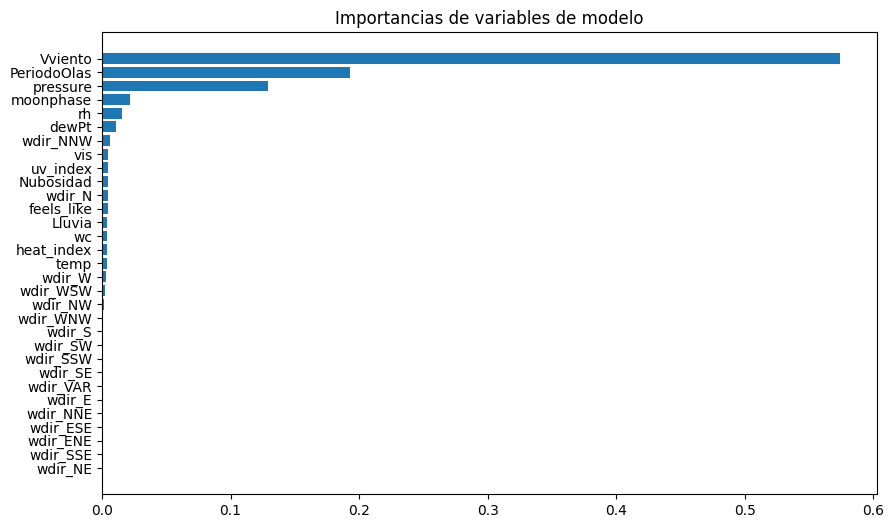

In [6]:
plt.figure(figsize=(10,6))
importancias = pd.DataFrame({'value': model.feature_importances_,'name': df_observ.drop(columns=['anio', 'mes', 'dia', 'hora', 'AlturaOlas']).columns})
importancias = importancias.sort_values(by='value')
plt.barh(y=importancias.name, width=importancias.value)
plt.title('Importancias de variables de modelo')

funcion auxiliar para ver los rangos de las variables

In [7]:
def range_eval(var):
    print(var)
    print('\t\t ', 'max', '  min')
    print('OBS\t\t ', df_observ[var].max(), df_observ[var].min())
    print('mini OBS ', df_observ_mini[var].max(), df_observ_mini[var].min())
    print('FORECAST ', df_forecast[var].max(), df_forecast[var].min())

### 1. VViento
(nudos)

In [8]:
var = 'Vviento'

Primero veremos el rango de la variable(max y min)

In [9]:
range_eval(var)

Vviento
		  max   min
OBS		  39 0
mini OBS  39 1
FORECAST  18 1


### 2. PeriodoOlas
(segundos)

In [10]:
var = 'PeriodoOlas'

Primero veremos el rango de la variable(max y min)

In [11]:
range_eval(var)

PeriodoOlas
		  max   min
OBS		  22 0
mini OBS  22 0
FORECAST  11 2


### 3. PRESION
(inHg, pulgadas de mercurio)

In [12]:
var = 'pressure'

Primero veremos el rango de la variable(max y min)

In [13]:
range_eval(var)

pressure
		  max   min
OBS		  30.79 28.32
mini OBS  30.76 28.655
FORECAST  30.36 29.66


## Distribución las alturas de las olas

Al tener predicciones del futuro (momentos posteriores a la fecha de elaboración de este código) nos quedaremos con las filas que tengan el valor real de la variable objetivo, AlturaOlas.

In [14]:
df_forecast_con_olas = df_forecast[~df_forecast.AlturaOlas.isna()]

Como tenemos datos de horas repetidas, las eliminamos para quedarnos con solo datos unicos(observaciones)

In [15]:
alturasObservaciones = df_forecast_con_olas.drop_duplicates(['anio', 'mes', 'dia', 'hora'])[['anio', 'mes', 'dia', 'hora', 'AlturaOlas']]

Vemos que hay relativamente muy pocas observaciones

In [16]:
alturasObservaciones.shape

(104, 5)

In [17]:
def class_ola(ola):
    if (ola < 1):
        return "x<1"
    if (ola < 2):
        return "1<x<2"
    if (ola < 3):
        return "2<x<3"
    else:
        return "x>3"

<Axes: title={'center': 'Segmentación de olas'}>

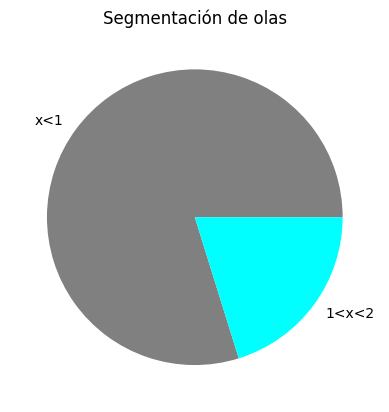

In [18]:
ola_clas = alturasObservaciones.AlturaOlas.map(class_ola)
ola_clas.value_counts().plot(kind='pie', label='', title='Segmentación de olas', colors=['gray', "aqua", "yellow", "red"])

En este caso las olas son de altura medianamente baja